# Pre Processamento de Dados


## Importar as *libraries*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Importar o *dataset*

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/Bandtec/Aula1_PreProcessamento/seguros.csv')
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1333 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.670090,1.094918,13270.422265
std,14.049960,6.101179,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


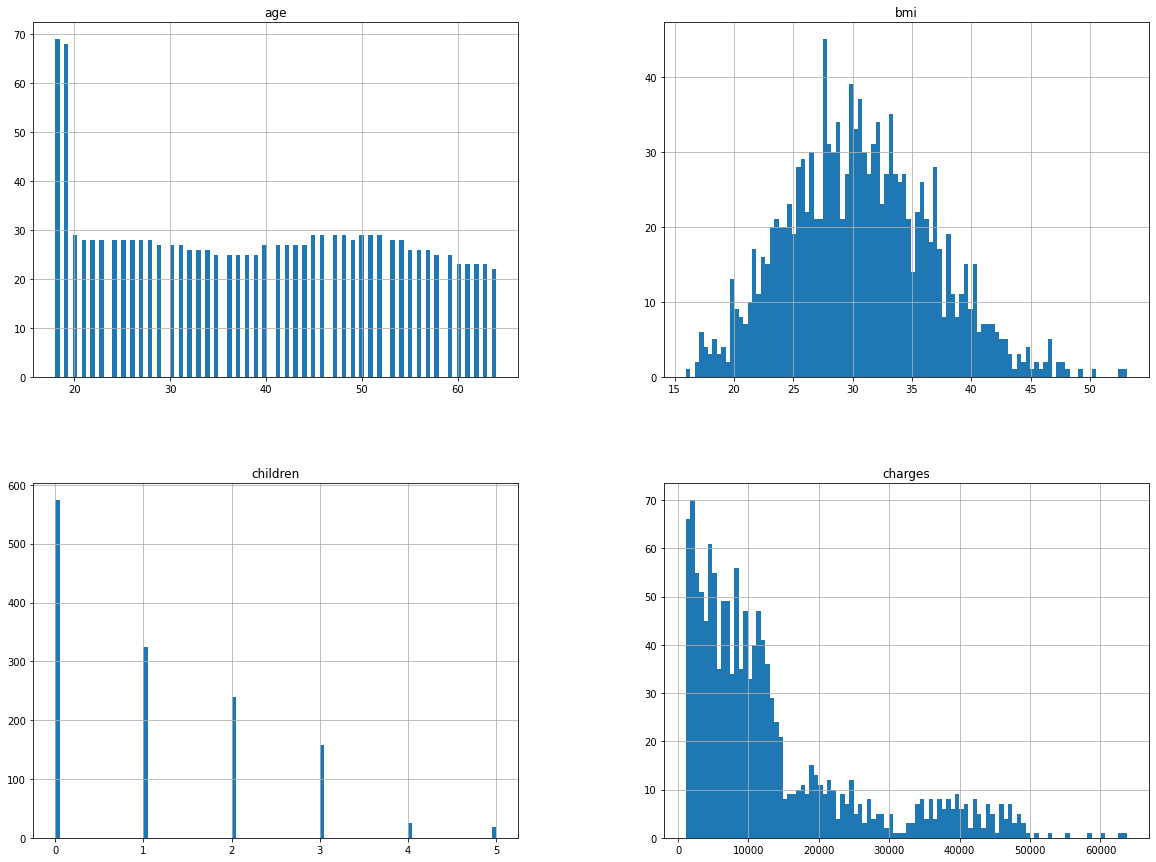

In [12]:
dataset.hist(bins=100, figsize=(20,15))
plt.show()

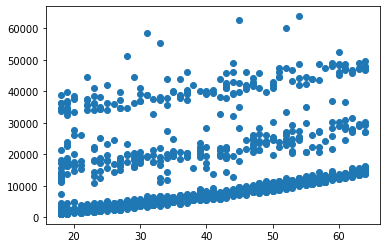

In [13]:
fig, ax = plt.subplots()
ax.scatter(dataset['age'],dataset['charges'],)

In [14]:
dataset.isna().sum()

age         0
sex         5
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
dataset.query('sex.isnull() or bmi.isnull()', engine='python')

,age,sex,bmi,children,smoker,region,charges
5,31,NaN,25.740,0,no,southeast,3756.62160
25,59,female,NaN,3,no,southeast,14001.13380
141,26,NaN,32.490,1,no,northeast,3490.54910
441,33,female,NaN,0,yes,southwest,37079.37200
461,42,NaN,30.000,0,yes,southwest,22144.03200
761,23,male,NaN,1,no,southwest,2416.95500
845,60,NaN,32.450,0,yes,southeast,45008.95550
1113,28,female,NaN,3,no,northwest,5312.16985
1282,18,female,NaN,0,yes,northeast,14283.45940
1324,31,NaN,25.935,1,no,northwest,4239.89265


In [ ]:
#caso seja necessário rodar uma formula e substituir valores em colunas 
#dataset.eval("overweight = bmi > 25", inplace=True)

In [ ]:
#caso seja necessário eliminar colunas 
#dataset.drop("bmi", axis='columns')

#caso seja necessario reordenar colunas
#columns_titles = ["age","sex","overweight","children","smoker","region","charges"]
#dataset=dataset.reindex(columns=columns_titles)

In [16]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
print(X )

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [18]:
print(y )

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


 ## Tratar dados faltantes

In [19]:
trf1 = ColumnTransformer(transformers =[
    ('categoricos', SimpleImputer(strategy ='most_frequent'), [1, 4, 5]),
    ('numericos', SimpleImputer(strategy ='median'), [0, 2, 3]),
      
], remainder ='passthrough')

In [20]:
first_step = trf1.fit_transform(X )
first_step

array([['female', 'yes', 'southwest', 19.0, 27.9, 0.0],
       ['male', 'no', 'southeast', 18.0, 33.77, 1.0],
       ['male', 'no', 'southeast', 28.0, 33.0, 3.0],
       ...,
       ['female', 'no', 'southeast', 18.0, 36.85, 0.0],
       ['female', 'no', 'southwest', 21.0, 25.8, 0.0],
       ['female', 'yes', 'northwest', 61.0, 29.07, 0.0]], dtype=object)

as colunas foram reordenadas na ordem dos transformadores que passamos para o ColumnTransformer. 

In [21]:
pd.DataFrame(first_step).head(10)

,0,1,2,3,4,5
0,female,yes,southwest,19.0,27.9,0.0
1,male,no,southeast,18.0,33.77,1.0
2,male,no,southeast,28.0,33.0,3.0
3,male,no,northwest,33.0,22.705,0.0
4,male,no,northwest,32.0,28.88,0.0
5,male,no,southeast,31.0,25.74,0.0
6,female,no,southeast,46.0,33.44,1.0
7,female,no,northwest,37.0,27.74,3.0
8,male,no,northeast,37.0,29.83,2.0
9,female,no,northwest,60.0,25.84,0.0


In [22]:
colunas=["sex","smoker","region","age","bmi","children"]

In [23]:
pd.DataFrame(first_step).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

## Encoding dos dados categóricos

In [24]:
trf2 = ColumnTransformer(transformers =[
    ('enc', OneHotEncoder( ), list(range(3))),
], remainder ='passthrough')

In [25]:
second_step = trf2.fit_transform(first_step)
pd.DataFrame(second_step).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.9,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.77,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.0,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.88,0.0


 ## Feature Scaling

In [27]:
sc = StandardScaler()

In [28]:
X_new = sc.fit_transform(second_step)

In [29]:
print(X_new)

[[ 1.01354464 -1.01354464 -1.97058663 ... -1.43876426 -0.45487933
  -0.90861367]
 [-0.98663637  0.98663637  0.5074631  ... -1.50996545  0.50939075
  -0.07876719]
 [-0.98663637  0.98663637  0.5074631  ... -0.79795355  0.38290217
   1.58092576]
 ...
 [ 1.01354464 -1.01354464  0.5074631  ... -1.50996545  1.01534506
  -0.90861367]
 [ 1.01354464 -1.01354464  0.5074631  ... -1.29636188 -0.79984819
  -0.90861367]
 [ 1.01354464 -1.01354464 -1.97058663 ...  1.55168573 -0.2626824
  -0.90861367]]
